Senaryo
NeuraTech E-Ticaret platformunda, farklı ürün kategorilerindeki satışlar müşteri değerlendirmeleri ve ürünlerin kargo süreleri hakkında verilirimiz var.

Bu verileri kullanarak:
1. Kategori bazında satıs analizi ( bar plot )
2. Değerlendirme puanı dağılımı ( histogram ve yoğunluk grafiği) ( hisplot )
3. Satıilar ve değerlendirme ülişkisi ( saçılım grafiği )
4. Kargo süresi ve Satış İlişkisi ( regresyon grafiği ) ( regplot )
5. Kategorilere göre değerlendirme puanı karşılaştırması ( kutu grafiği) ( boxplot )
6. Satışlar ve değerlendirme puanlarını zaman için değişimi ( çizgi grafikleri )

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

In [13]:
# Genişletilmiş örnek veri oluşturalım
np.random.seed(42)

veri = {
    'Kategori': np.random.choice(['Elektronik', 'Giyim', 'Ev & Yaşam', 'Kitap'], 1000),
    'Satışlar': np.random.randint(50, 500, 1000),
    'Değerlendirme': np.random.uniform(1, 5, 1000),
    'Kargo Süresi': np.random.randint(1, 10, 1000),  # Kargo süresi (gün)
    'Tarih': [datetime.date(2023, 1, 1) + datetime.timedelta(days=i) for i in range(1000)] # Satış tarihleri
}

df = pd.DataFrame(veri)

/tmp/ipykernel_3776/1802010451.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Kategori'].value_counts().index, y=df['Kategori'].value_counts().values, palette='viridis')


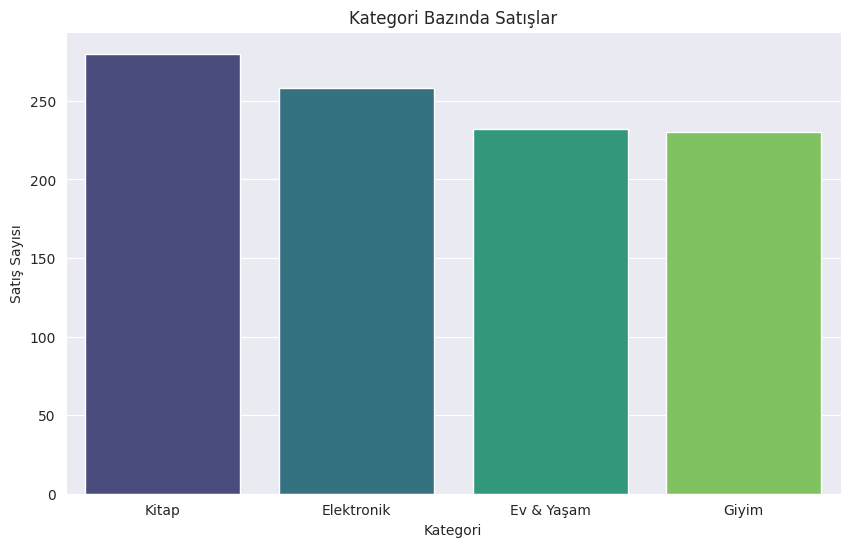

In [14]:
# 1. Kategori bazında satış analizi (bar plot)
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Kategori'].value_counts().index, y=df['Kategori'].value_counts().values, palette='viridis')
plt.title('Kategori Bazında Satışlar')
plt.xlabel('Kategori')
plt.ylabel('Satış Sayısı')
plt.show()

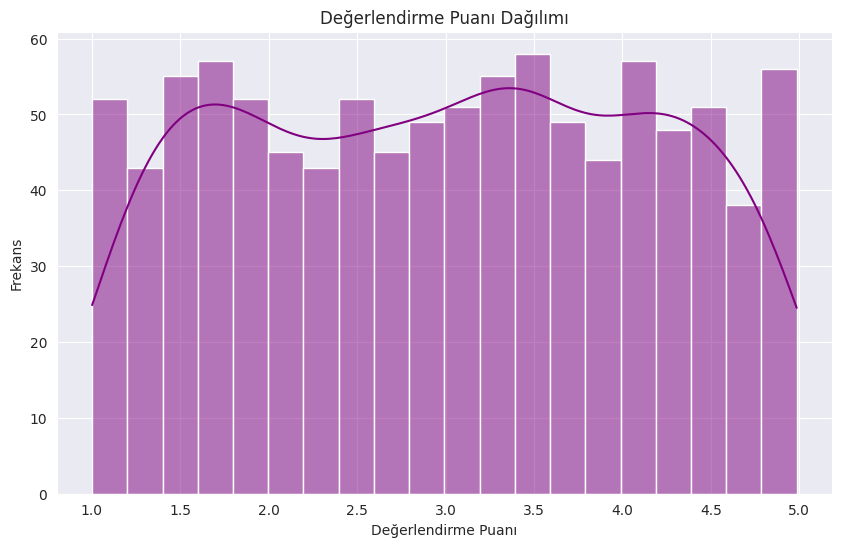

In [15]:
# 2. Değerlendirme puanı dağılımı (histogram ve yoğunluk grafiği) (histplot)
plt.figure(figsize=(10, 6))
sns.histplot(df['Değerlendirme'], kde=True, color='purple', bins=20)
plt.title('Değerlendirme Puanı Dağılımı')
plt.xlabel('Değerlendirme Puanı')
plt.ylabel('Frekans')
plt.show()

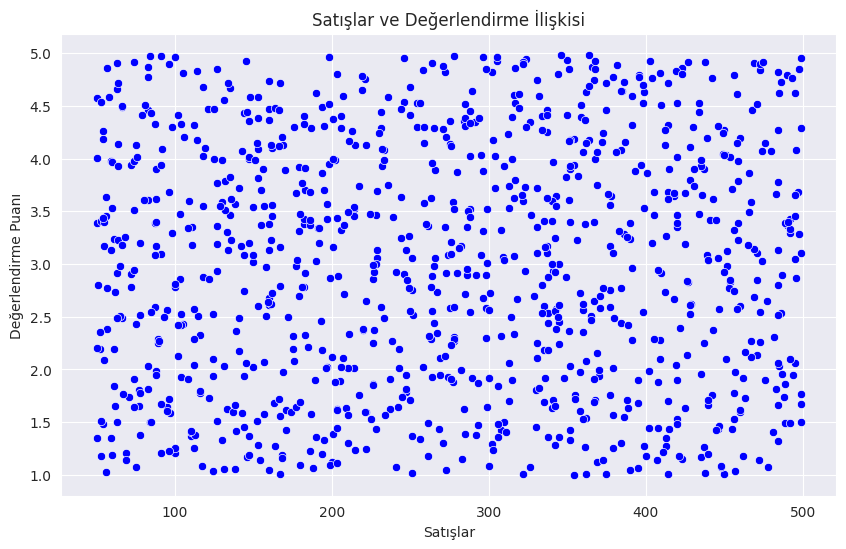

In [16]:
# 3. Satışlar ve değerlendirme ilişkisi (saçılım grafiği)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Satışlar'], y=df['Değerlendirme'], color='blue')
plt.title('Satışlar ve Değerlendirme İlişkisi')
plt.xlabel('Satışlar')
plt.ylabel('Değerlendirme Puanı')
plt.show()

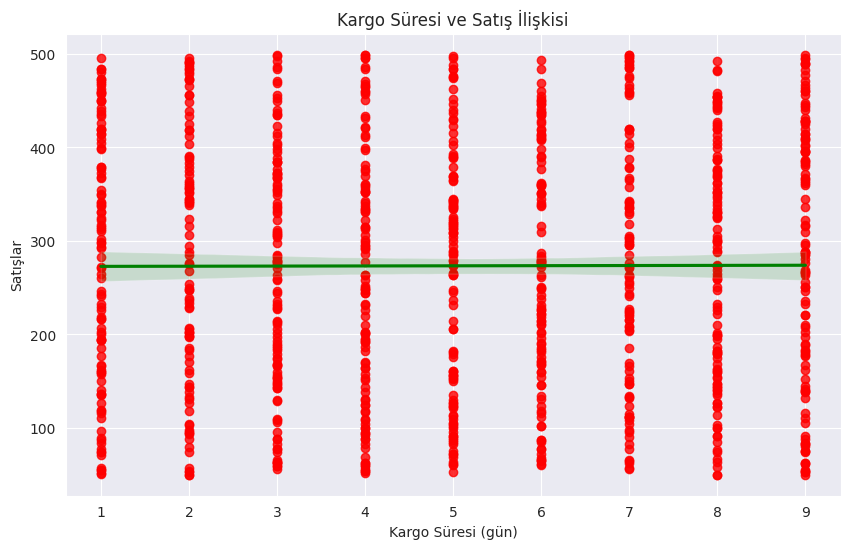

In [17]:
# 4. Kargo süresi ve satış ilişkisi (regresyon grafiği) (regplot)
plt.figure(figsize=(10, 6))
sns.regplot(x=df['Kargo Süresi'], y=df['Satışlar'], scatter_kws={'color': 'red'}, line_kws={'color': 'green'})
plt.title('Kargo Süresi ve Satış İlişkisi')
plt.xlabel('Kargo Süresi (gün)')
plt.ylabel('Satışlar')
plt.show()

/tmp/ipykernel_3776/2589708550.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Kategori', y='Değerlendirme', data=df, palette='coolwarm')


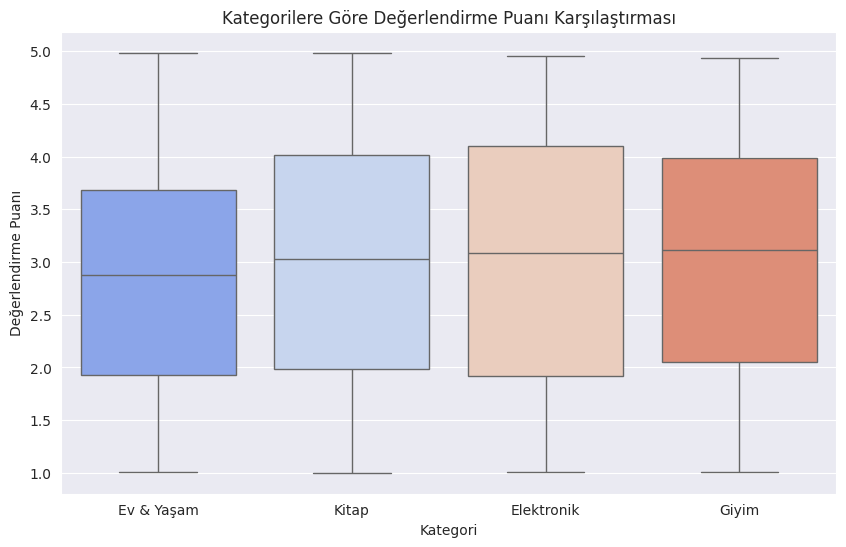

In [18]:
# 5. Kategorilere göre değerlendirme puanı karşılaştırması (kutu grafiği) (boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Kategori', y='Değerlendirme', data=df, palette='coolwarm')
plt.title('Kategorilere Göre Değerlendirme Puanı Karşılaştırması')
plt.xlabel('Kategori')
plt.ylabel('Değerlendirme Puanı')
plt.show()

<Figure size 1200x600 with 0 Axes>

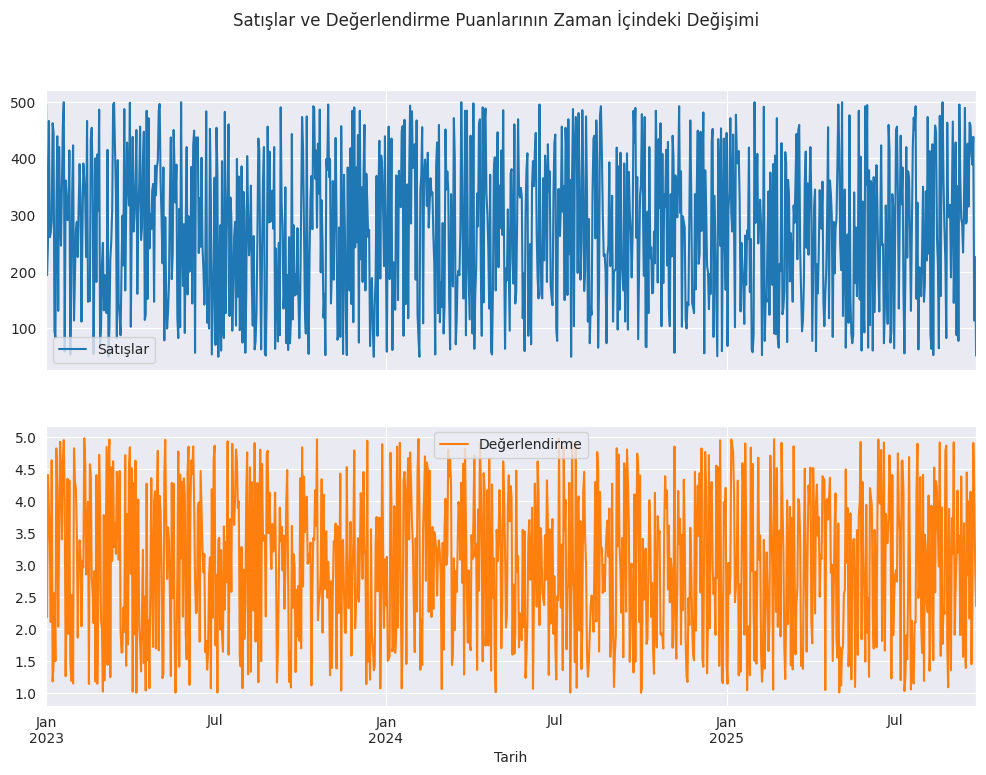

In [19]:
# 6. Satışlar ve değerlendirme puanlarının zaman içindeki değişimi (çizgi grafikleri)
plt.figure(figsize=(12, 6))
df['Tarih'] = pd.to_datetime(df['Tarih'])
df.groupby(df['Tarih']).agg({'Satışlar': 'sum', 'Değerlendirme': 'mean'}).plot(kind='line', subplots=True, layout=(2, 1), figsize=(12, 8))
plt.suptitle('Satışlar ve Değerlendirme Puanlarının Zaman İçindeki Değişimi')
plt.show()